In [1]:
#Importing all required packages
import pandas as pd
import numpy as np
import seaborn as sns
import re
import string
from string import punctuation

import nltk
from nltk.corpus import stopwords
nltk.download("stopwords")
from nltk import pos_tag
from nltk.tokenize import WhitespaceTokenizer
from nltk.stem import WordNetLemmatizer
nltk.download('averaged_perceptron_tagger')
nltk.download('wordnet')
nltk.download('vader_lexicon')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\Deepe\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     C:\Users\Deepe\AppData\Roaming\nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\Deepe\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\Deepe\AppData\Roaming\nltk_data...
[nltk_data]   Package vader_lexicon is already up-to-date!


True

In [2]:
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [3]:
#Downloading dataset
df = pd.read_csv("Womens Clothing E-Commerce Reviews.csv")

In [4]:
#Dropping unnecessary columns
df = df.drop(['Title', 'Positive Feedback Count', 'Sr. No.'], axis=1)
#Dropping rows containing missing values, data cleaning
df.dropna(inplace = True)

In [5]:
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name
0,767,33,Absolutely wonderful - silky and comfortable,4,1,Initmates,Intimate,Intimates
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses
2,1077,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses


<AxesSubplot:xlabel='Rating', ylabel='count'>

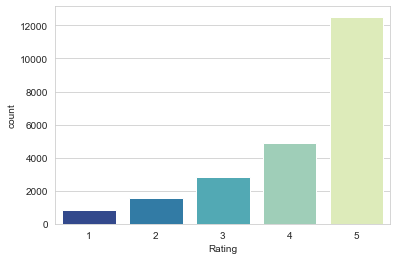

In [6]:
#Plotting the ratings on a graph - visualizing data
sns.set_style('whitegrid')
sns.countplot(x='Rating', data=df, palette='YlGnBu_r')

In [7]:
#Calculation of Polarity
df['Polarity Rating'] = df['Rating'].apply(lambda x: 'Positive' if x > 3 else('Neutral' if x == 3 else 'Negative'))
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity Rating
0,767,33,Absolutely wonderful - silky and comfortable,4,1,Initmates,Intimate,Intimates,Positive
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive
2,1077,60,I had such high hopes for this dress and reall...,3,0,General,Dresses,Dresses,Neutral
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive


<AxesSubplot:xlabel='Polarity Rating', ylabel='count'>

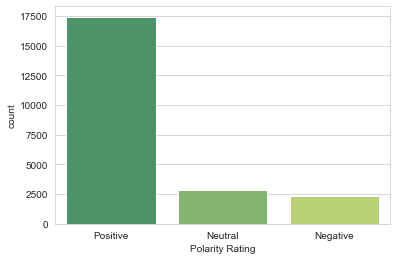

In [8]:
#Plotting polarity on a graph - Visualizing data
sns.set_style('whitegrid')
sns.countplot(x='Polarity Rating', data=df, palette = 'summer')

In [9]:
from nltk.corpus import wordnet

def get_wordnet_pos(pos_tag):
    if pos_tag.startswith('J'):
        return wordnet.ADJ
    elif pos_tag.startswith('V'):
        return wordnet.VERB
    elif pos_tag.startswith('N'):
        return wordnet.NOUN
    elif pos_tag.startswith('R'):
        return wordnet.ADV
    else:
        return wordnet.NOUN

In [10]:
#Data Preprocessing
df_positive = df[df['Polarity Rating'] == 'Positive'][0:8000]
df_negative = df[df['Polarity Rating'] == 'Negative']
df_neutral = df[df['Polarity Rating'] == 'Neutral']

In [11]:
#Sample negative and neutral polarity dataset and create final dataframe
df_neutral_final = df_neutral.sample(8000, replace = True)
df_negative_final = df_negative.sample(8000, replace = True)
df = pd.concat([df_positive, df_negative_final, df_neutral_final], axis=0)

In [12]:
#Text Processing
def textProcessing(text):
    text = text.lower()
    #To remove punctuation
    text = [word.strip(string.punctuation) for word in text.split(" ")]
    #To remove words that contain numbers
    text = [word for word in text if not any(c.isdigit() for c in word)]
    #To remove stop words
    stop = stopwords.words('english')
    text = [x for x in text if x not in stop]
    #To remove empty tokens
    text = [t for t in text if len(t) > 0]
    #Pos tag text
    pos_tags = pos_tag(text)
    #Lemmatize text
    text = [WordNetLemmatizer().lemmatize(t[0], get_wordnet_pos(t[1])) for t in pos_tags]
    #To remove words with only one letter
    text = [t for t in text if len(t) > 1]
    #Now, joining all 
    text = " ".join(text)
    return text

In [13]:
df['Review'] = df['Review Text'].apply(textProcessing)
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity Rating,Review
0,767,33,Absolutely wonderful - silky and comfortable,4,1,Initmates,Intimate,Intimates,Positive,absolutely wonderful silky comfortable
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive,love dress sooo pretty happen find store i'm g...
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous ev...
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive,shirt flatter due adjustable front tie perfect...
6,858,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,Positive,aded basket hte last mintue see would look lik...


In [14]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer

In [15]:
sid = SentimentIntensityAnalyzer()
df['Sentiments'] = df['Review'].apply(lambda x: sid.polarity_scores(x))
df = pd.concat([df.drop(['Sentiments'], axis = 1), df['Sentiments'].apply(pd.Series)], axis = 1)
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity Rating,Review,neg,neu,pos,compound
0,767,33,Absolutely wonderful - silky and comfortable,4,1,Initmates,Intimate,Intimates,Positive,absolutely wonderful silky comfortable,0.000,0.209,0.791,0.8204
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive,love dress sooo pretty happen find store i'm g...,0.000,0.503,0.497,0.9710
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous ev...,0.179,0.183,0.638,0.9437
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive,shirt flatter due adjustable front tie perfect...,0.000,0.513,0.487,0.8860
6,858,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,Positive,aded basket hte last mintue see would look lik...,0.049,0.824,0.127,0.6361


In [16]:
df['Number of Characters'] = df['Review'].apply(lambda x: len(x))
df['Number of Words'] = df['Review'].apply(lambda x: len(x.split(" ")))
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity Rating,Review,neg,neu,pos,compound,Number of Characters,Number of Words
0,767,33,Absolutely wonderful - silky and comfortable,4,1,Initmates,Intimate,Intimates,Positive,absolutely wonderful silky comfortable,0.000,0.209,0.791,0.8204,38,4
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive,love dress sooo pretty happen find store i'm g...,0.000,0.503,0.497,0.9710,174,30
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous ev...,0.179,0.183,0.638,0.9437,88,14
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive,shirt flatter due adjustable front tie perfect...,0.000,0.513,0.487,0.8860,108,16
6,858,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,Positive,aded basket hte last mintue see would look lik...,0.049,0.824,0.127,0.6361,283,47


In [17]:
from gensim.test.utils import common_texts
from gensim.models.doc2vec import Doc2Vec, TaggedDocument

In [18]:
documents = [TaggedDocument(doc,[i]) for i,doc in enumerate(df['Review'].apply(lambda x: x.split(" ")))]

In [19]:
model = Doc2Vec(documents, vector_size=5, window=2, min_count=1, workers=4)

doc2vec_df = df['Review'].apply(lambda x: model.infer_vector(x.split(" "))).apply(pd.Series)
doc2vec_df.columns = ["doc2vec_vector_" + str(x) for x in doc2vec_df.columns]
df = pd.concat([df, doc2vec_df], axis=1)
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity Rating,Review,...,neu,pos,compound,Number of Characters,Number of Words,doc2vec_vector_0,doc2vec_vector_1,doc2vec_vector_2,doc2vec_vector_3,doc2vec_vector_4
0,767,33,Absolutely wonderful - silky and comfortable,4,1,Initmates,Intimate,Intimates,Positive,absolutely wonderful silky comfortable,...,0.209,0.791,0.8204,38,4,0.169602,0.095588,-0.010409,-0.032155,-0.096785
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive,love dress sooo pretty happen find store i'm g...,...,0.503,0.497,0.9710,174,30,-0.107729,0.031354,-0.147080,-0.370793,0.439445
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous ev...,...,0.183,0.638,0.9437,88,14,0.104200,0.121208,-0.040598,0.156000,0.156817
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive,shirt flatter due adjustable front tie perfect...,...,0.513,0.487,0.8860,108,16,0.086387,0.174704,0.116306,-0.019309,-0.114612
6,858,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,Positive,aded basket hte last mintue see would look lik...,...,0.824,0.127,0.6361,283,47,0.193651,0.614302,0.748976,-0.721769,0.051979


In [20]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(min_df = 6)
tfidf_result = tfidf.fit_transform(df['Review']).toarray()
tfidf_df = pd.DataFrame(tfidf_result, columns=tfidf.get_feature_names())
tfidf_df.columns = ["word_" + str(x) for x in tfidf_df.columns]
tfidf_df.index = df.index
df = pd.concat([df, tfidf_df], axis=1)
df.head()

,Clothing ID,Age,Review Text,Rating,Recommended IND,Division Name,Department Name,Class Name,Polarity Rating,Review,...,word_yumi,word_yummy,word_zag,word_zero,word_zig,word_zip,word_zipped,word_zipper,word_zone,word_zoom
0,767,33,Absolutely wonderful - silky and comfortable,4,1,Initmates,Intimate,Intimates,Positive,absolutely wonderful silky comfortable,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1080,34,Love this dress! it's sooo pretty. i happene...,5,1,General,Dresses,Dresses,Positive,love dress sooo pretty happen find store i'm g...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1049,50,"I love, love, love this jumpsuit. it's fun, fl...",5,1,General Petite,Bottoms,Pants,Positive,love love love jumpsuit fun flirty fabulous ev...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,847,47,This shirt is very flattering to all due to th...,5,1,General,Tops,Blouses,Positive,shirt flatter due adjustable front tie perfect...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,858,39,I aded this in my basket at hte last mintue to...,5,1,General Petite,Tops,Knits,Positive,aded basket hte last mintue see would look lik...,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [21]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

def show_wordcloud(data, title = None):
    wordcloud = WordCloud(background_color = 'white', max_words = 200, max_font_size = 40, scale = 3,
                          random_state = 42).generate(str(data))
    fig = plt.figure(1, figsize=(20,20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize = 20)
        fig.subplots_adjust(top = 2.3)
        
    plt.imshow(wordcloud)
    plt.show()

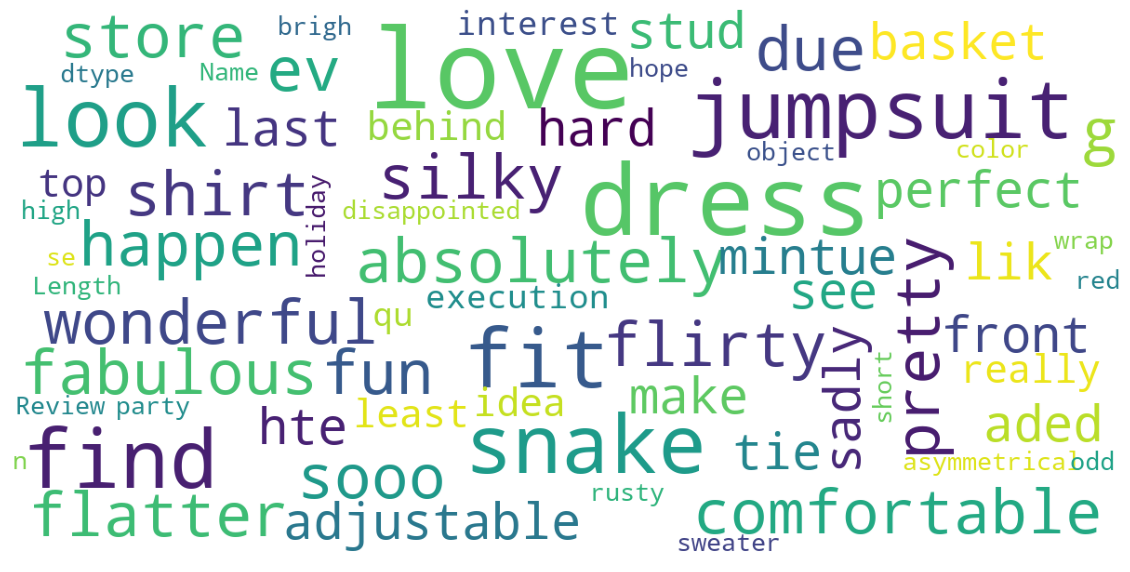

In [22]:
show_wordcloud(df['Review'])

In [23]:
df[df["Number of Words"] >= 5].sort_values("pos", ascending = False)[["Review", "pos"]].head(10)

,Review,pos
6588,love top gorgeous fit great,1.00
5201,swimsuit beautiful fit wonderfully flatter com...,0.96
9428,cute top great beautiful bright color,0.94
9428,cute top great beautiful bright color,0.94
9428,cute top great beautiful bright color,0.94
9428,cute top great beautiful bright color,0.94
9428,cute top great beautiful bright color,0.94
9428,cute top great beautiful bright color,0.94
9428,cute top great beautiful bright color,0.94
9428,cute top great beautiful bright color,0.94


In [24]:
df[df["Number of Words"] >= 5].sort_values("neg", ascending = False)[["Review", "neg"]].head(10)

,Review,neg
6296,awful color horribly wrinkle mess...so disappoint,0.752
6296,awful color horribly wrinkle mess...so disappoint,0.752
6296,awful color horribly wrinkle mess...so disappoint,0.752
6296,awful color horribly wrinkle mess...so disappoint,0.752
14754,cut design seem hems.\r\n disappointed retailer,0.565
14754,cut design seem hems.\r\n disappointed retailer,0.565
14754,cut design seem hems.\r\n disappointed retailer,0.565
14754,cut design seem hems.\r\n disappointed retailer,0.565
588,fit strange odd cut look well,0.525
588,fit strange odd cut look well,0.525
